In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
col_name = ['user_id','item_id','rating','timestamp']
mr = pd.read_csv('file.tsv', sep= '\t', names= col_name)
mr.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
mr.shape

(100003, 4)

In [4]:
movie_title = pd.read_csv('Movie_Id_Titles.csv')
movie_title.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
movie_title.shape

(1682, 2)

In [6]:
movie_title.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [7]:
dataset = pd.merge(mr, movie_title, on='item_id')
dataset.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [8]:
dataset.shape

(100003, 5)

In [9]:
dataset.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

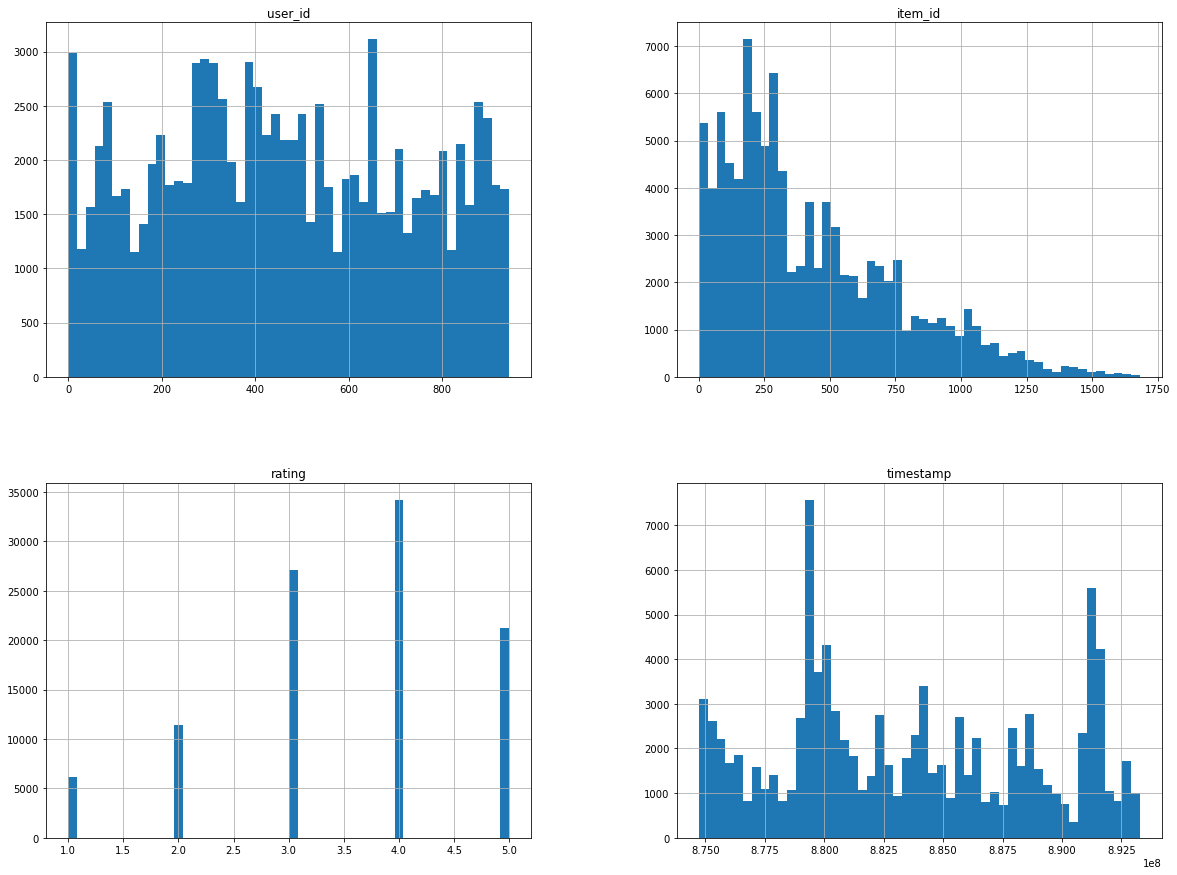

In [10]:
dataset.hist(bins= 50, figsize=(20,15))
plt.show()

In [11]:
dataset.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
dataset.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
rating = pd.DataFrame(dataset.groupby('title')['rating'].mean())
rating['num of rating'] = pd.DataFrame(dataset.groupby('title')['rating'].count())
rating.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


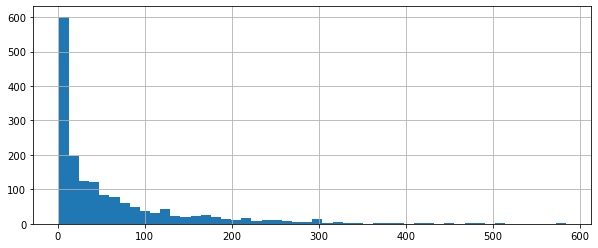

In [14]:
rating['num of rating'].hist(bins=50, figsize= (10,4))
plt.show()

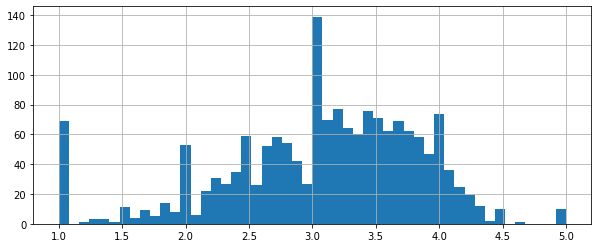

In [15]:
rating['rating'].hist(bins=50, figsize= (10,4))
plt.show()

In [16]:
moviemat = dataset.pivot_table(index = 'user_id', columns = 'title', values= 'rating')
moviemat.head()
rating.sort_values('num of rating', ascending= False).head()

,rating,num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [17]:
starwar_user_rating = moviemat['Star Wars (1977)']
starwar_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [20]:
similar_to_starwar = moviemat.corrwith(starwar_user_rating)

corr_starwar = pd.DataFrame(similar_to_starwar, columns = ['Correlation'])
corr_starwar.dropna(inplace= True)

corr_starwar.head()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [21]:
corr_starwar.sort_values('Correlation',ascending= False).head()
corr_starwar = corr_starwar.join(rating['num of rating'])
corr_starwar[corr_starwar['num of rating']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [27]:
s= input("Enter the Movie Name:")

movie_user_rating = moviemat[s]
movie_user_rating.head()
    
similar_to_movie = moviemat.corrwith(movie_user_rating)

corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
corr_movie.dropna(inplace= True)

corr_movie.head()
    
corr_movie.sort_values('Correlation',ascending= False).head()
corr_movie = corr_movie.join(rating['num of rating'])
corr_movie[corr_movie['num of rating']>100].sort_values('Correlation', ascending = False).head()
    


Enter the Movie Name: Toy Story (1995)


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of rating
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
